### 0. Setup

In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [2]:
%cd "/content/gdrive/MyDrive/BME/TA/AI4Healthcare-sem1-2021-2022/TA-sessions/Ses-3"

/content/gdrive/MyDrive/BME/TA/AI4Healthcare-sem1-2021-2022/TA-sessions/Ses-3


### 1. Dataset and 2.Feature engineering the same the previous [lab](https://colab.research.google.com/drive/1t6sfaS5Ib2M08StDwRox9paxHUjWAN62?usp=sharing)

In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("Dataset/heart_failure_clinical_records_dataset.csv")

In [5]:
outputs = df["DEATH_EVENT"].values
inputs_n = df[["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]].values
inputs_c = df[["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]].values

In [6]:
fs = SelectKBest(score_func= chi2, k = 3)
fs.fit(inputs_c, outputs)
inputs_c_fs = fs.transform(inputs_c)

In [8]:
scaler = MinMaxScaler()
scaler.fit(inputs_n)
inputs_n = scaler.transform(inputs_n)

In [9]:
fs = SelectKBest(score_func = f_classif, k = 5)
fs.fit(inputs_n, outputs)
inputs_n_fs = fs.transform(inputs_n)

In [10]:
inputs = np.hstack([inputs_n_fs, inputs_c_fs])
inputs.shape

(299, 8)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size = 0.2, random_state = 42)

#3. Create model ANN

In [22]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Dropout

In [14]:
X_train.shape

(239, 8)

In [15]:
def create_model(input_shape, output_shape):
  input = Input(shape = input_shape)
  x = Dense(units = 32, activation = "relu")(input)
  x = Dense(units = 64, activation = "relu")(x)
  x = Dense(units = 32, activation = "relu")(x)
  output = Dense(units = 1, activation = "sigmoid")(x)
  return Model(input, output)

In [16]:
model = create_model((8, ), 1)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,513
Trainable params: 4,513
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train,
                    epochs = 50,
                    batch_size = 16,
                    validation_data = (X_test, y_test))

Epoch 1/50
15/15 [==============================] - 4s 37ms/step - loss: 0.6493 - accuracy: 0.6904 - val_loss: 0.6720 - val_accuracy: 0.5833
Epoch 2/50
15/15 [==============================] - 0s 12ms/step - loss: 0.5940 - accuracy: 0.7029 - val_loss: 0.6980 - val_accuracy: 0.5833
Epoch 3/50
15/15 [==============================] - 0s 11ms/step - loss: 0.5742 - accuracy: 0.7029 - val_loss: 0.6814 - val_accuracy: 0.5833
Epoch 4/50
15/15 [==============================] - 0s 10ms/step - loss: 0.5512 - accuracy: 0.7029 - val_loss: 0.6481 - val_accuracy: 0.5833
Epoch 5/50
15/15 [==============================] - 0s 10ms/step - loss: 0.5238 - accuracy: 0.7071 - val_loss: 0.6327 - val_accuracy: 0.6000
Epoch 6/50
15/15 [==============================] - 0s 12ms/step - loss: 0.4917 - accuracy: 0.7155 - val_loss: 0.6089 - val_accuracy: 0.6167
Epoch 7/50
15/15 [==============================] - 0s 10ms/step - loss: 0.4614 - accuracy: 0.7908 - val_loss: 0.6032 - val_accuracy: 0.6500
Epoch 8/50
15

+ Training set

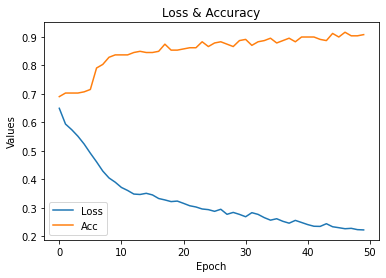

In [19]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Loss & Accuracy')
plt.ylabel('Values')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Acc'])
plt.show()

+ Validating set

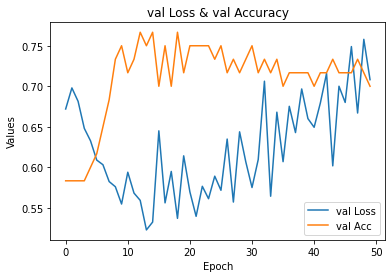

In [20]:
plt.figure()
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title('val Loss & val Accuracy')
plt.ylabel('Values')
plt.xlabel('Epoch')
plt.legend(['val Loss', 'val Acc'])
plt.show()

+ Compare acc_train and acc_val

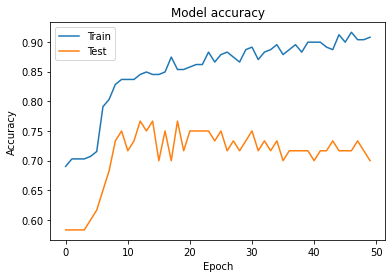

In [21]:
plt.figure()
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

--> Overfitting

In [25]:
def create_model_with_dropout(input_shape, output_shape):
  input = Input(shape = input_shape)
  x = Dense(units = 32, activation = "relu")(input)
  x = Dropout(rate = 0.1, seed = 1)(x)
  x = Dense(units = 64, activation = "relu")(x)
  x = Dropout(rate = 0.1, seed = 2)(x)
  x = Dense(units = 32, activation = "relu")(x)
  x = Dropout(rate = 0.1, seed = 3)(x)
  output = Dense(units = 1, activation = "sigmoid")(x)
  return Model(input, output)

In [26]:
model = create_model_with_dropout((8, ), 1)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_5 (Dense)             (None, 32)                288       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0   

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy'])

In [28]:
history = model.fit(X_train, y_train,
                    epochs = 50,
                    batch_size = 16,
                    validation_data = (X_test, y_test))

Epoch 1/50
15/15 [==============================] - 2s 46ms/step - loss: 0.6752 - accuracy: 0.5983 - val_loss: 0.6758 - val_accuracy: 0.5833
Epoch 2/50
15/15 [==============================] - 0s 10ms/step - loss: 0.6343 - accuracy: 0.7029 - val_loss: 0.6711 - val_accuracy: 0.5833
Epoch 3/50
15/15 [==============================] - 0s 10ms/step - loss: 0.6033 - accuracy: 0.7029 - val_loss: 0.6761 - val_accuracy: 0.5833
Epoch 4/50
15/15 [==============================] - 0s 10ms/step - loss: 0.5815 - accuracy: 0.7029 - val_loss: 0.6740 - val_accuracy: 0.5833
Epoch 5/50
15/15 [==============================] - 0s 10ms/step - loss: 0.5646 - accuracy: 0.7029 - val_loss: 0.6653 - val_accuracy: 0.5833
Epoch 6/50
15/15 [==============================] - 0s 10ms/step - loss: 0.5336 - accuracy: 0.7113 - val_loss: 0.6340 - val_accuracy: 0.5833
Epoch 7/50
15/15 [==============================] - 0s 11ms/step - loss: 0.5165 - accuracy: 0.7364 - val_loss: 0.6035 - val_accuracy: 0.6167
Epoch 8/50
15

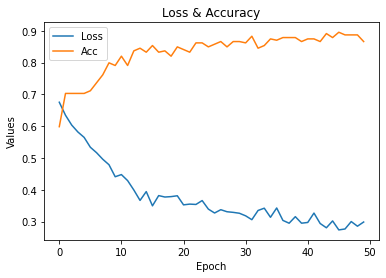

In [29]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Loss & Accuracy')
plt.ylabel('Values')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Acc'])
plt.show()

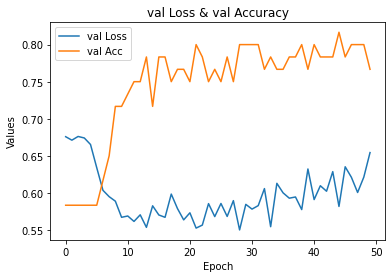

In [30]:
plt.figure()
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title('val Loss & val Accuracy')
plt.ylabel('Values')
plt.xlabel('Epoch')
plt.legend(['val Loss', 'val Acc'])
plt.show()

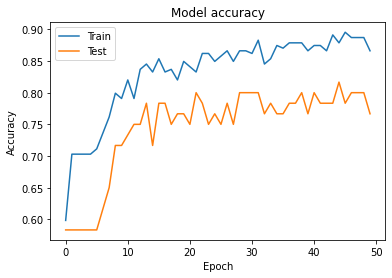

In [31]:
plt.figure()
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

It's better

### 3.1 Create checkpoint for best model

In [63]:
from tensorflow.keras.callbacks import ModelCheckpoint
import os

In [71]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath = "best_model_ANN.h5", monitor = 'val_accuracy', mode = 'max', 
              save_best_only = True, verbose  =1)

In [72]:
model = create_model_with_dropout((8, ), 1)
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy'])

In [73]:
history = model.fit(X_train, y_train,
                    epochs = 50,
                    batch_size = 16,
                    validation_data = (X_test, y_test), 
                    callbacks = callback)

Epoch 1/50
13/15 [=========================>....] - ETA: 0s - loss: 0.6667 - accuracy: 0.6442 
Epoch 00001: val_accuracy improved from -inf to 0.58333, saving model to best_model_ANN.h5
15/15 [==============================] - 1s 23ms/step - loss: 0.6508 - accuracy: 0.6611 - val_loss: 0.6656 - val_accuracy: 0.5833
Epoch 2/50
13/15 [=========================>....] - ETA: 0s - loss: 0.6000 - accuracy: 0.7019
Epoch 00002: val_accuracy did not improve from 0.58333
15/15 [==============================] - 0s 7ms/step - loss: 0.5959 - accuracy: 0.7029 - val_loss: 0.6789 - val_accuracy: 0.5833
Epoch 3/50
14/15 [===========================>..] - ETA: 0s - loss: 0.5872 - accuracy: 0.6920
Epoch 00003: val_accuracy did not improve from 0.58333
15/15 [==============================] - 0s 6ms/step - loss: 0.5768 - accuracy: 0.7029 - val_loss: 0.6812 - val_accuracy: 0.5833
Epoch 4/50
13/15 [=========================>....] - ETA: 0s - loss: 0.5575 - accuracy: 0.6971
Epoch 00004: val_accuracy did not 

In [74]:
!ls

1.How-to-connect-Google-Colab
2.KNN_Classification_Structure_Data.KNN_Classification
3.ANN_Structure_Data
best_model_ANN.h5
Dataset
KNN_Classification_model.pkl


### 4. Load best model

In [75]:
from keras.models import load_model

In [76]:
bestmodel = load_model("best_model_ANN.h5")

### 5. Verify model

In [92]:
y_pred = bestmodel.predict(X_test)

In [93]:
y_pred[:5]

array([[0.05566699],
       [0.00862839],
       [0.07582673],
       [0.9992611 ],
       [0.07040973]], dtype=float32)

In [95]:
y_pred = np.where(y_pred < 0.5, 0, 1)

In [96]:
y_pred[:5]

array([[0],
       [0],
       [0],
       [1],
       [0]])

In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
cm = confusion_matrix(y_test, y_pred.squeeze())
cm

array([[34,  1],
       [12, 13]])

In [99]:
acc = (cm[0][0] + cm[1][1])/ (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0])
print(acc)

0.7833333333333333


compute acc by evaluate() method

In [79]:
acc = bestmodel.evaluate(X_test, y_test)[1]
acc

2/2 [==============================] - 0s 9ms/step - loss: 0.5913 - accuracy: 0.7833


0.7833333611488342

### 6. Save model

In [100]:
bestmodel.save("bestmodel.h5")

In [101]:
!ls

1.How-to-connect-Google-Colab
2.KNN_Classification_Structure_Data.KNN_Classification
3.ANN_Structure_Data
best_model_ANN.h5
bestmodel.h5
Dataset
KNN_Classification_model.pkl
